# Calibration of the hyper-parameters of a gaussian process regressor by maximum likelihood

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats 
from scipy.optimize import minimize_scalar

from utils import *

## Définition des paramètres

In [2]:
N = 100
X = np.linspace(0, 1, N)
lbda = 0.1
X[:10]

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909])

### 1) a)

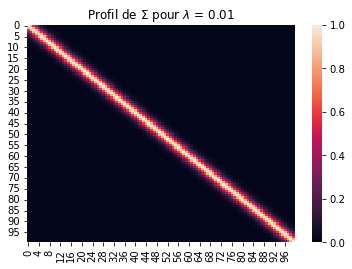

'\nsigma = sigmaKov(X, X, 0.1, add_noise=False)\nsns.heatmap(sigma)\nplt.title("Profil de $\\Sigma$ pour $\\lambda$ = 0.1")\nplt.show()\nsigma = sigmaKov(X, X, 1, add_noise=False)\nsns.heatmap(sigma)\nplt.title("Profil de $\\Sigma$ pour $\\lambda$ = 1")\nplt.show()\n'

In [3]:
sigma = sigmaKov(X, X, 0.01, add_noise=False)
sns.heatmap(sigma)
plt.title("Profil de $\Sigma$ pour $\lambda$ = 0.01")
plt.show()
"""
sigma = sigmaKov(X, X, 0.1, add_noise=False)
sns.heatmap(sigma)
plt.title("Profil de $\Sigma$ pour $\lambda$ = 0.1")
plt.show()
sigma = sigmaKov(X, X, 1, add_noise=False)
sns.heatmap(sigma)
plt.title("Profil de $\Sigma$ pour $\lambda$ = 1")
plt.show()
"""


<AxesSubplot:>

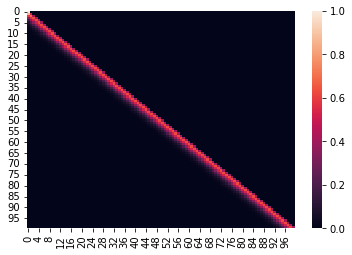

In [4]:
L = np.linalg.cholesky(sigma)
sns.heatmap(L)

Que vaut $m + L^t G$ ?

1) b)

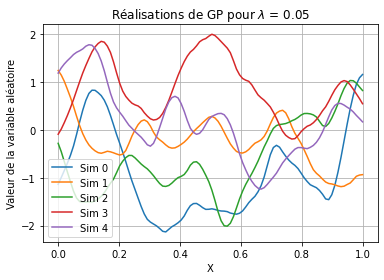

In [5]:

simulGP_gauss(X, 100, 0.05)

### Question 2)

In [6]:
#N = 100
#X = np.linspace(0, 1, N)
X_train = draw_uniform_in_intervals(N)
Y_train = np.sin(4 * np.pi * X_train)
Z = Y_train
#lbda=0.05

In [7]:
minimize_scalar(neglikelihood, args=(Z), method="bounded", bounds=[1e-7, 100])

     fun: -697.6819117912232
 message: 'Solution found.'
    nfev: 31
  status: 0
 success: True
       x: 3.457457021302515

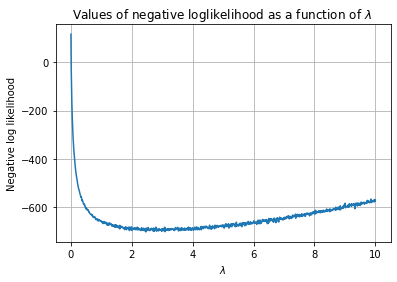

In [8]:
Xtest = np.linspace(1e-7, 10, 1000)
Ytest = [neglikelihood(x, Z) for x in Xtest]
plt.plot(Xtest, Ytest)
plt.title("Values of negative loglikelihood as a function of $\lambda$ ")
plt.xlabel("$\lambda$")
plt.ylabel("Negative log likelihood")
plt.grid()
plt.show()

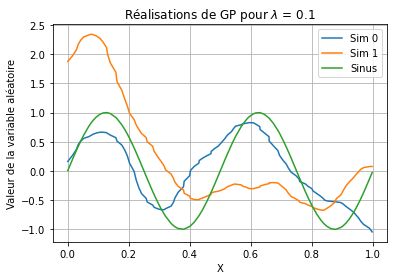

In [9]:
#minimize_scalar(neglikelihood, args=(Z))
simulGP_sin(X, N, 0.1)

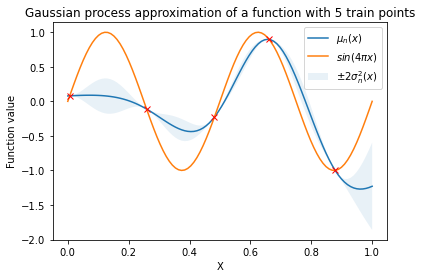

In [17]:
Nprime = 5
X_train = draw_uniform_in_intervals(Nprime)
Y_train = np.sin(4 * np.pi * X_train)
mu_s, cov_s = parameters(X, X_train, Y_train, 0.1)

plot_GP(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train)

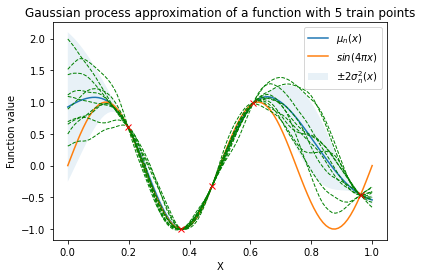

In [18]:
Nprime = 5
X_train = draw_uniform_in_intervals(Nprime)
Y_train = np.sin(4 * np.pi * X_train)
mu_s, cov_s = parameters(X, X_train, Y_train, 0.1)

samples = generate_GP_samples(mu_s, cov_s, len(X), 10)
plot_GP(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)

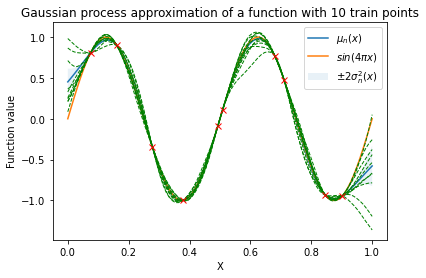

In [19]:
Nprime = 10
X_train = draw_uniform_in_intervals(Nprime)
Y_train = np.sin(4 * np.pi * X_train)
mu_s, cov_s = parameters(X, X_train, Y_train, 0.1)

samples = generate_GP_samples(mu_s, cov_s, len(X), 10)
plot_GP(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)


In [11]:
#samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 3)
#plot_gp(mu_s, cov_s, X, X_train=X_train, Y_train=Y_train, samples=samples)